In [2]:
import os
os.chdir("C:/Users/VIGNESH/Desktop/datasets")
os.getcwd()

'C:\\Users\\VIGNESH\\Desktop\\datasets'

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [5]:
df=pd.read_csv("OnlineRetail.csv")

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df=df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
TotalAmount = df['Quantity'] * df['UnitPrice']
df.insert(loc=5,column='TotalAmount',value=TotalAmount)

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,TotalAmount,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8:26,15.30,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8:26,20.34,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8:26,22.00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8:26,20.34,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8:26,20.34,3.39,17850.0,United Kingdom


In [8]:
new_df = df[['CustomerID','InvoiceNo','StockCode','Quantity','TotalAmount','InvoiceDate','Country']]

new_df2 = df.copy()

In [9]:
country_price = new_df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_price

Country
United Kingdom          4008533
Netherlands              200128
EIRE                     136329
Germany                  117448
France                   109848
Australia                 83653
Sweden                    35637
Switzerland               29778
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16044
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Israel                     3990
Poland                     3653
Canada                     2763
Iceland                    2458
Unspecified                1789
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652
Czech Republic              592


In [10]:
Total = country_price
df.insert(loc=5,column='Total',value=TotalAmount)

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Total,TotalAmount,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8:26,15.30,15.30,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8:26,20.34,20.34,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8:26,22.00,22.00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8:26,20.34,20.34,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8:26,20.34,20.34,3.39,17850.0,United Kingdom


In [12]:
country_price = df.groupby('Total')['TotalAmount'].sum().sort_values(ascending = False)
country_price

Total
 15.00        301230.00
 168469.60    168469.60
 17.70        162379.80
 30.00        156780.00
 19.80        150975.00
                ...    
-8142.75       -8142.75
-8322.12       -8322.12
-38970.00     -38970.00
-77183.60     -77183.60
-168469.60   -168469.60
Name: TotalAmount, Length: 4041, dtype: float64

<module 'matplotlib' from 'D:\\anconda\\Lib\\site-packages\\matplotlib\\__init__.py'>

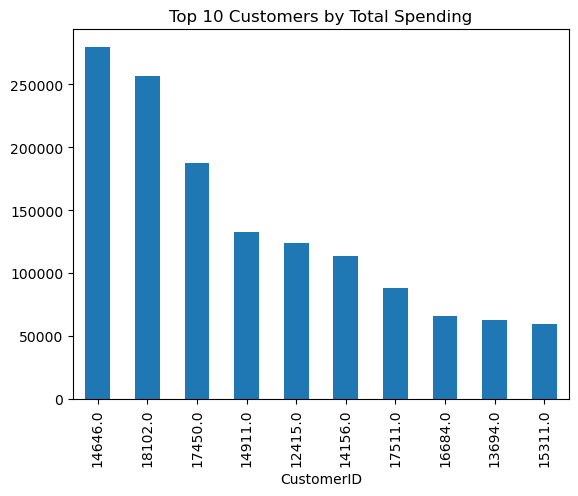

In [16]:
top_customers = new_df.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Total Spending')
plt

<module 'matplotlib' from 'D:\\anconda\\Lib\\site-packages\\matplotlib\\__init__.py'>

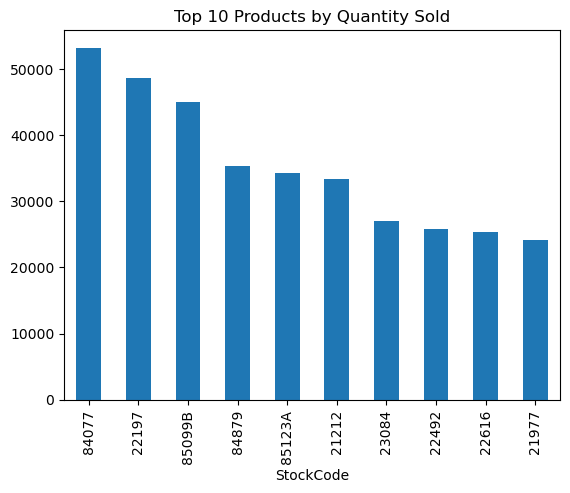

In [15]:
top_products = new_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Products by Quantity Sold')
plt

C:\Users\VIGNESH\AppData\Local\Temp\ipykernel_7340\1768266738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'], format="%d-%m-%Y %H:%M")
C:\Users\VIGNESH\AppData\Local\Temp\ipykernel_7340\1768266738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Month'] = new_df['InvoiceDate'].dt.month_name()


<module 'matplotlib' from 'D:\\anconda\\Lib\\site-packages\\matplotlib\\__init__.py'>

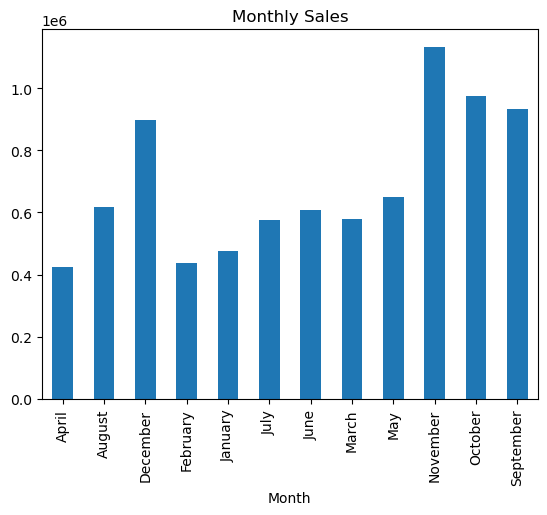

In [23]:

new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'], format="%d-%m-%Y %H:%M")


new_df['Month'] = new_df['InvoiceDate'].dt.month_name()

monthly_sales = new_df.groupby('Month')['TotalAmount'].sum()
monthly_sales.plot(kind='bar', title='Monthly Sales')
plt


In [24]:
print(monthly_sales)


Month
April         426047.851
August        616368.000
December      897110.400
February      436546.150
January       475074.380
July          574238.481
June          608013.160
March         579964.610
May           648251.080
November     1132407.740
October       974603.590
September     931440.372
Name: TotalAmount, dtype: float64


In [27]:
print(new_df.columns)


Index(['CustomerID', 'InvoiceNo', 'StockCode', 'Quantity', 'TotalAmount',
       'InvoiceDate', 'Country', 'Month'],
      dtype='object')


In [30]:

new_df = df[['CustomerID', 'InvoiceNo', 'StockCode', 'Quantity', 'TotalAmount', 'InvoiceDate', 'Country','UnitPrice']]




<module 'matplotlib' from 'D:\\anconda\\Lib\\site-packages\\matplotlib\\__init__.py'>

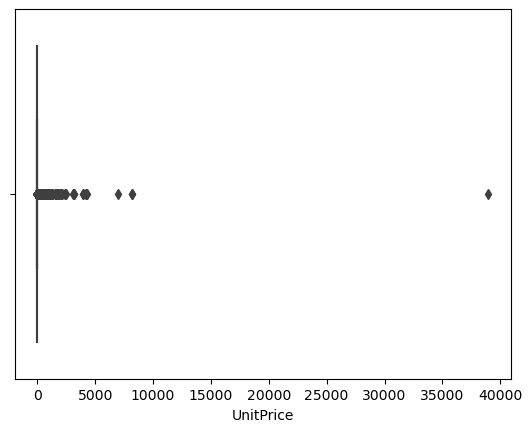

In [33]:
import seaborn as sns
sns.boxplot(x=new_df['UnitPrice'])

plt

AttributeError: module 'matplotlib' has no attribute 'show'

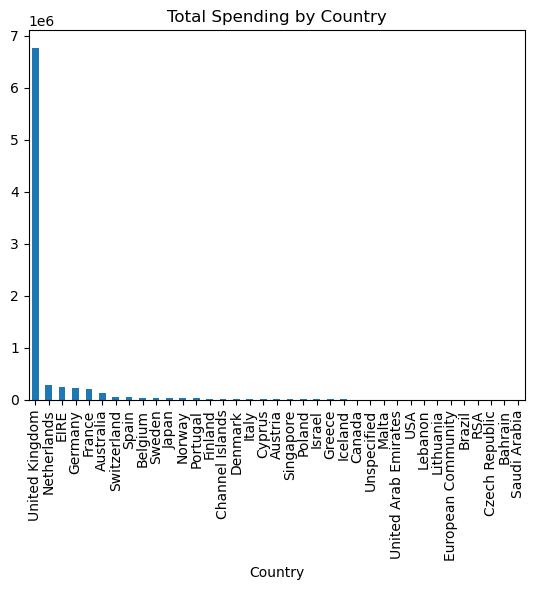

In [42]:

new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'], format="%d-%m-%Y %H:%M")


new_df['Month'] = new_df['InvoiceDate'].dt.month_name()

cancellations = new_df[new_df['InvoiceNo'].str.startswith('C')]
cancellation_count = len(cancellations)

returns = new_df[new_df['Quantity'] < 0]
return_count = len(returns)

print("Cancellations Count:", cancellation_count)
print("Returns Count:", return_count)

cancellation_month_count = cancellations['Month'].value_counts()

return_month_count = returns['Month'].value_counts()

print("\nMonth-wise Cancellations:")
print(cancellation_month_count)

print("\nMonth-wise Returns:")
print(return_month_count)

most_cancellation_month = cancellation_month_count.idxmax()
most_cancellation_count = cancellation_month_count.max()
print("\nMonth with the Most Cancellations:", most_cancellation_month, "Count:", most_cancellation_count)

most_return_month = return_month_count.idxmax()
most_return_count = return_month_count.max()
print("\nMonth with the Most Returns:", most_return_month, "Count:", most_return_count)


C:\Users\VIGNESH\AppData\Local\Temp\ipykernel_7340\873299734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'], format="%d-%m-%Y %H:%M")
C:\Users\VIGNESH\AppData\Local\Temp\ipykernel_7340\873299734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Month'] = new_df['InvoiceDate'].dt.month_name()


Cancellations Count: 8905
Returns Count: 8905

Month-wise Cancellations:
Month
October      1138
November     1053
December     1047
September     792
January       680
July          675
June          651
August        649
March         645
May           586
April         554
February      435
Name: count, dtype: int64

Month-wise Returns:
Month
October      1138
November     1053
December     1047
September     792
January       680
July          675
June          651
August        649
March         645
May           586
April         554
February      435
Name: count, dtype: int64

Month with the Most Cancellations: October Count: 1138

Month with the Most Returns: October Count: 1138


In [45]:
cluster_data = new_df[['TotalAmount', 'Quantity']]
cluster_data

,TotalAmount,Quantity
0,15.30,6
1,20.34,6
2,22.00,8
3,20.34,6
4,20.34,6
...,...,...
541904,10.20,12
541905,12.60,6
541906,16.60,4
541907,16.60,4


In [48]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

In [49]:

cluster_data = new_df[['TotalAmount', 'Quantity']]

scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

D:\anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: module 'matplotlib' has no attribute 'title'

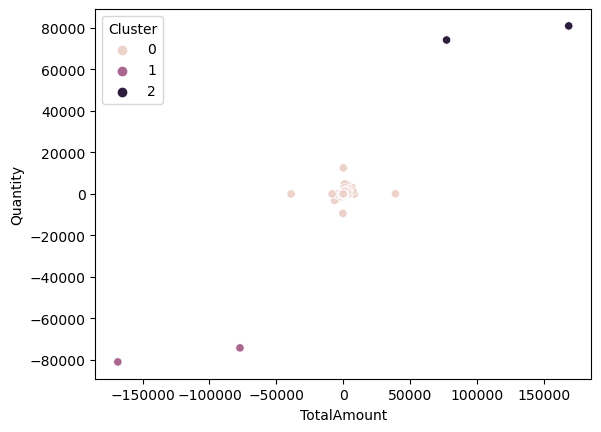

In [50]:
kmeans = KMeans(n_clusters=3, random_state=42)
new_df['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

sns.scatterplot(x='TotalAmount', y='Quantity', hue='Cluster', data=new_df)
plt.title('Customer Segmentation based on Spending and Quantity')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'suptitle'

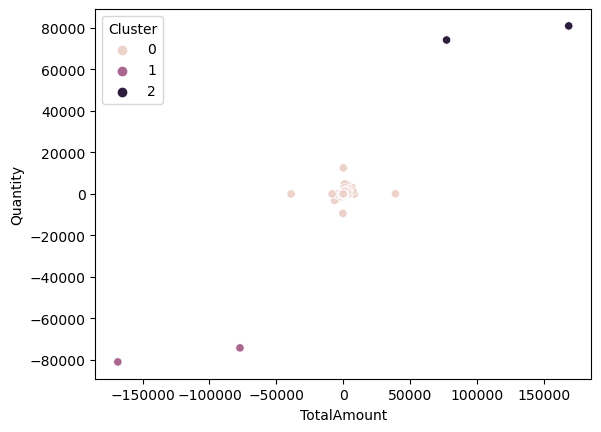

In [51]:
sns.scatterplot(x='TotalAmount', y='Quantity', hue='Cluster', data=new_df)
plt.suptitle('Customer Segmentation based on Spending and Quantity')
plt.show()


In [ ]:
pip install --upgrade matplotlib


In [1]:
TotalAmount = df['Quantity'] * df['UnitPrice']
df.insert(loc=5,column='TotalAmount',value=TotalAmount)

NameError: name 'df' is not defined

In [9]:
new_df = df[['CustomerID','InvoiceNo','StockCode','Quantity','TotalAmount','InvoiceDate','Country']]

new_df2 = df.copy()

In [10]:
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country
0,17850.0,536365,85123A,6,15.30,01-12-2010 8:26,United Kingdom
1,17850.0,536365,71053,6,20.34,01-12-2010 8:26,United Kingdom
2,17850.0,536365,84406B,8,22.00,01-12-2010 8:26,United Kingdom
3,17850.0,536365,84029G,6,20.34,01-12-2010 8:26,United Kingdom
4,17850.0,536365,84029E,6,20.34,01-12-2010 8:26,United Kingdom


In [11]:


country_price = new_df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_price

Country
United Kingdom          4008533
Netherlands              200128
EIRE                     136329
Germany                  117448
France                   109848
Australia                 83653
Sweden                    35637
Switzerland               29778
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16044
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Israel                     3990
Poland                     3653
Canada                     2763
Iceland                    2458
Unspecified                1789
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652
Czech Republic              592


<Axes: xlabel='Country'>

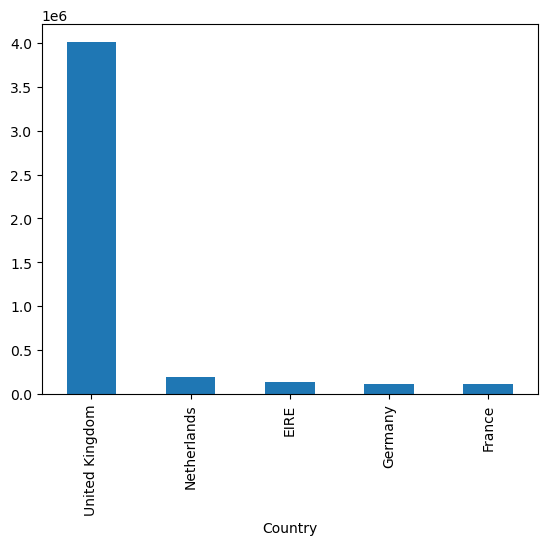

In [12]:

country_price[:5].plot(kind = 'bar')

<Axes: xlabel='Country'>

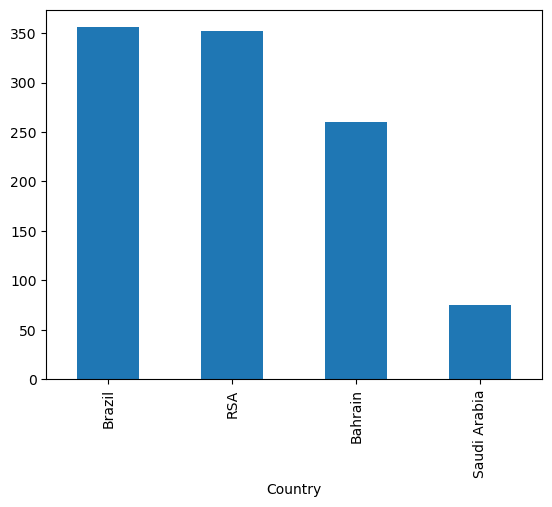

In [13]:

country_price[33:].plot(kind = 'bar')

In [17]:

new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'], format='%d-%m-%Y %H:%M')

new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'])

timest = new_df['InvoiceDate'].dt.year

new_df['Year'] = timest

new_df.head()


C:\Users\VIGNESH\AppData\Local\Temp\ipykernel_24848\1729141041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'], format='%d-%m-%Y %H:%M')
C:\Users\VIGNESH\AppData\Local\Temp\ipykernel_24848\1729141041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'])
C:\Users\VIGNESH\AppData\Local\Temp\ipykernel_24848\1729141041.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country,Year
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom,2010
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom,2010
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom,2010
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom,2010
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom,2010


<Axes: xlabel='Year'>

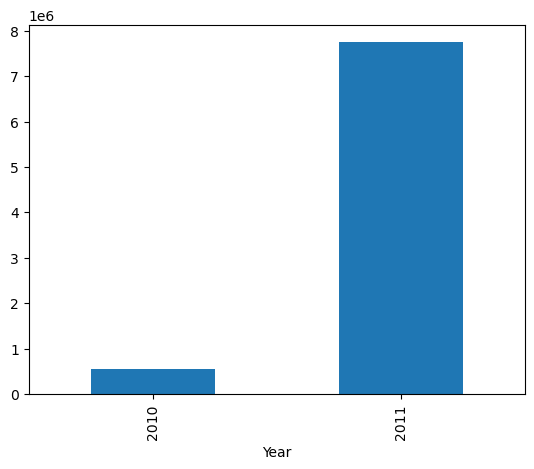

In [18]:


new_df.groupby('Year')['TotalAmount'].sum().plot(kind = 'bar')

<Axes: title={'center': 'Sales month wise'}, xlabel='Mon,Year'>

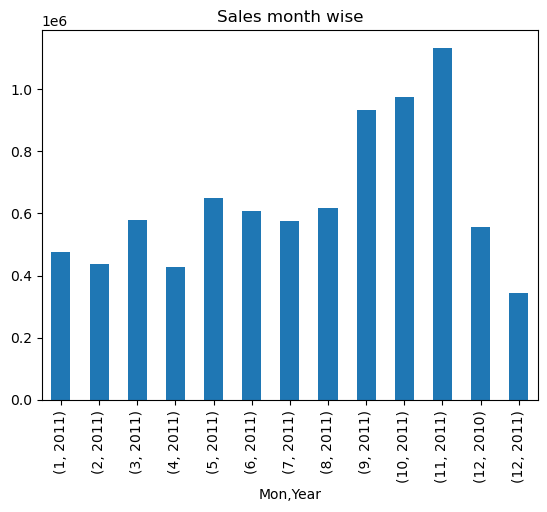

In [19]:


new_df['Mon'] = new_df['InvoiceDate'].dt.month
new_df['month'] = new_df['InvoiceDate'].dt.month_name() 
new_df.groupby(['Mon','Year'])['TotalAmount'].sum().plot(kind = 'bar', title = 'Sales month wise')

In [20]:

get_2011 = new_df[(new_df['Year'] == 2011)]
get_dec2011 = get_2011[(new_df['month'] == 'December')]
get_dec2011 = get_dec2011['InvoiceDate'].dt.date.unique()
get_dec2011

C:\Users\VIGNESH\AppData\Local\Temp\ipykernel_24848\2588636060.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  get_dec2011 = get_2011[(new_df['month'] == 'December')]


array([datetime.date(2011, 12, 1), datetime.date(2011, 12, 2),
       datetime.date(2011, 12, 4), datetime.date(2011, 12, 5),
       datetime.date(2011, 12, 6), datetime.date(2011, 12, 7),
       datetime.date(2011, 12, 8), datetime.date(2011, 12, 9)],
      dtype=object)

<Axes: title={'center': 'Most Customers for country'}, xlabel='Country'>

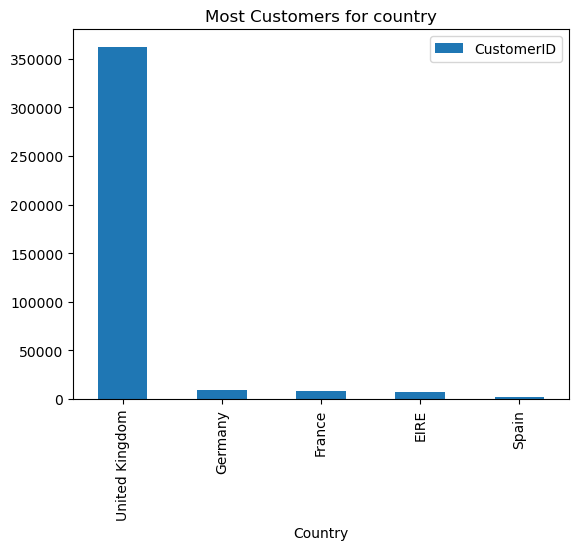

In [21]:

cus_id = pd.DataFrame(new_df.groupby('Country')['CustomerID'].count().sort_values(ascending = False))
cus_id[:5].plot(kind = 'bar', title = 'Most Customers for country')

<Axes: title={'center': 'Least customers for country'}, xlabel='Country'>

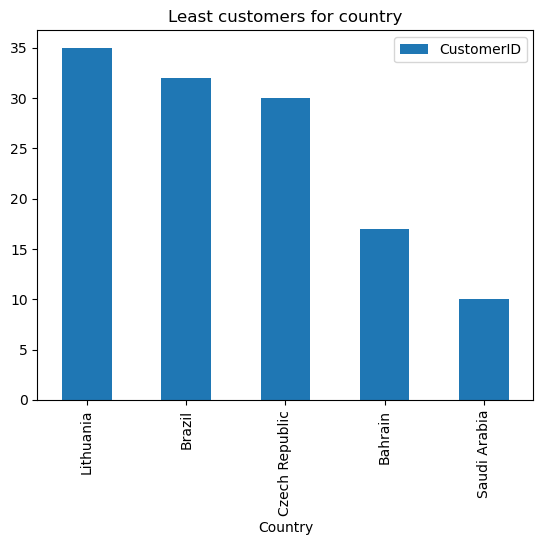

In [22]:

cus_id[-5:].plot(kind = 'bar', title = 'Least customers for country')

In [23]:

new_df2 = new_df2.dropna()
new_df2.isnull().sum()
new_df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,TotalAmount,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8:26,15.30,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8:26,20.34,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8:26,22.00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8:26,20.34,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8:26,20.34,3.39,17850.0,United Kingdom


In [25]:
# Sales Average of each product
avg_sales = new_df2.groupby(['StockCode', 'Description'])[['Quantity', 'TotalAmount']].mean().sort_values(by='Quantity', ascending=False)
avg_sales


,,Quantity,TotalAmount
StockCode,Description,,
47556B,TEA TIME TEA TOWELS,1300.000000,3022.500000
84568,GIRLS ALPHABET IRON ON PATCHES,520.000000,97.200000
84826,ASSTD DESIGN 3D PAPER STICKERS,368.702703,9.145405
18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,325.333333,21.320000
20914,SET/5 RED SPOTTY LID GLASS BOWLS,288.000000,734.400000
...,...,...,...
21412,VINTAGE GOLD TINSEL REEL,-6.000000,-2.520000
79323W,WHITE CHERRY LIGHTS,-8.000000,-54.000000
21144,PINK POODLE HANGING DECORATION,-12.000000,-4.560000
